# Ensemble Machine Learning Models applied to IoT Threat Classification

### Table of Contents

1. [Introduction](#1.-Introduction)

2. [Base Libraries](#2.-Base-Libraries)

3. [Data Loading and Preprocessing](#3.-Data-Loading-and-Preprocessing)

4. [Feature Selection](#4.-Feature-Selection)

5. [Model Training and Validation](#5.-Model-Training-and-Validation)

6. [Conclusions](#6.-Conclusions)

7. [References](#7.-References)

# 1. Introduction

The rapid growth of the Internet of Things (IoT) ecosystem has significantly enhanced the convenience and functionality of many modern technologies. However, with the proliferation of IoT devices, there has been a corresponding surge in potential security vulnerabilities. Detecting threats in an IoT environment is crucial to maintaining the integrity and safety of interconnected devices. This notebook delves into the application of multiple machine learning models to classify IoT threats, culminating in an ensemble technique to improve detection accuracy.

After importing essential libraries, the notebook proceeds with data loading and preprocessing, where we examine a dataset containing information on potential IoT threats. Following a thorough exploratory data analysis, we employ a feature selection mechanism, SelectKBest, to narrow down the most influential features that contribute to threat detection.

We then train and validate an array of machine learning models, including Logistic Regression, Decision Trees, Neural Networks, and more. By evaluating each model based on accuracy, precision, and recall, we gain insight into their individual performances. To further enhance the efficacy of our threat detection mechanism, an ensemble model is constructed by combining the top-performing models. The ensemble approach aims to capitalize on the strengths of each model, potentially offering better overall performance compared to individual models.

Through the subsequent sections of this notebook, we will walk through each step in detail, discussing the methodologies, challenges, and insights derived from our analysis.

# 2. Base Libraries

In this section, the necessary libraries and modules are imported. These range from data manipulation libraries like pandas and numpy to visualization tools such as matplotlib and seaborn. Additionally, various machine learning models and evaluation metrics from the Scikit-learn library are also imported. To ensure a smooth execution, any potential warnings, except for deprecation warnings, are suppressed.

In [1]:
# Useful libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Statistic and machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import xgboost as xgb  # pip install xgboost


# Ignore all warnings
warnings.filterwarnings("ignore")

# Re-enable DeprecationWarning
warnings.filterwarnings("default", category=DeprecationWarning)

# 3. Data Loading and Preprocessing

The dataset, sourced from a CSV file, is loaded into a DataFrame for inspection and manipulation. Preliminary exploration includes examining the first few rows, understanding the data's structure, and visualizing the distribution of labels. Any missing values are handled to ensure data integrity.

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data/iot_threat_data.csv',sep=',')

# Display the first 10 rows of the DataFrame
df.head(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,47.00,64.00,1.954123,1.954123,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.369840e+07,9.5,34.409301,0.000000,0.000000e+00,0.00,141.55,MIRAI-GREETH_FLOOD
1,0.142555,2322.79,6.66,79.77,493.283636,493.283636,0.0,0.0,0.0,0.0,...,35.347029,94.41,8.370717e+07,9.5,13.422817,48.122903,3.201473e+03,0.38,141.55,MIRAI-UDPPLAIN
2,37.887028,1687747.10,9.30,63.50,34.048221,34.048221,0.0,0.0,0.0,0.0,...,332.122451,817.50,5.235219e-03,5.5,24.333355,469.692075,2.092362e+05,0.90,38.50,BENIGNTRAFFIC
3,0.000000,0.00,47.00,64.00,3.118461,3.118461,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.367699e+07,9.5,34.409301,0.000000,0.000000e+00,0.00,141.55,MIRAI-GREETH_FLOOD
4,48.272384,128041.40,10.40,97.80,39966.184035,39966.184035,0.0,0.0,0.0,0.0,...,694.907070,636.40,1.665200e+08,13.5,36.393289,983.968335,4.842123e+05,1.00,244.60,BENIGNTRAFFIC
5,3.689854,1999693.34,16.83,64.00,967.363559,967.363559,0.0,0.0,0.0,0.0,...,52.387080,544.40,8.375901e+07,9.5,32.656804,74.159179,8.089021e+03,0.36,141.55,MIRAI-UDPPLAIN
6,48.095663,101026.40,8.80,137.70,13.947935,13.947935,0.0,0.0,0.0,0.0,...,1302.117190,919.30,2.724581e-02,5.5,47.214170,1841.471789,2.063959e+06,0.90,38.50,BENIGNTRAFFIC
7,2.334500,1092305.45,16.84,72.79,799.009104,799.009104,0.0,0.0,0.0,0.0,...,39.362002,526.65,8.375939e+07,9.5,32.376356,55.749657,7.805972e+03,0.21,141.55,MIRAI-UDPPLAIN
8,46.342407,1301464.80,4.80,168.30,34.223130,34.223130,0.0,0.0,0.0,0.0,...,0.428562,64.80,3.804951e-02,5.5,11.472815,0.606078,9.315556e-01,0.20,38.50,BENIGNTRAFFIC
9,88.807750,5290348.60,7.10,63.60,61.443831,61.443831,0.0,0.0,0.0,0.0,...,101.938534,1227.30,1.833391e-03,5.5,54.184531,144.162858,5.276998e+04,0.20,38.50,BENIGNTRAFFIC


In [3]:
# Display a concise summary of the DataFrame's columns, non-null values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732319 entries, 0 to 3732318
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [4]:
# Get the number of rows and columns in the DataFrame
df.shape

(3732319, 47)

In [5]:
# Display statistical summary of the DataFrame's columns
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3732319.0,3.732319e+06,3.732319e+06,3.732319e+06,...,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06,3.732319e+06
mean,1.254554e+01,6.672378e+05,2.763499e+01,7.986391e+01,6.203941e+03,6.203941e+03,0.0,1.339650e-06,1.125306e-05,1.848717e-05,...,5.820369e+02,1.583531e+02,5.823049e+02,8.352757e+07,9.494560e+00,3.251857e+01,2.236982e+02,1.939451e+05,3.281656e-01,1.414130e+02
std,6.356992e+01,1.175030e+06,1.762253e+01,3.619978e+01,7.558500e+04,7.558500e+04,0.0,1.157432e-03,3.354539e-03,4.299631e-03,...,3.657262e+02,3.807640e+02,3.691452e+02,4.525192e+07,2.174859e+00,9.773213e+00,5.387152e+02,9.911124e+05,3.880627e-01,5.597731e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,4.879952e+01,0.000000e+00,4.600000e+01,0.000000e+00,1.000000e+00,9.877158e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,9.300000e+00,6.400000e+01,8.916414e+00,8.916414e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,5.450422e+02,0.000000e+00,5.447300e+02,8.364670e+07,9.500000e+00,3.296077e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,4.360259e-01,1.984620e+04,1.700000e+01,6.400000e+01,4.401930e+01,4.401930e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,5.692970e+02,1.778853e+01,5.687800e+02,8.369380e+07,9.500000e+00,3.370369e+01,2.516585e+01,1.917812e+03,1.500000e-01,1.415500e+02
75%,6.239931e+00,9.218126e+05,4.659000e+01,7.120000e+01,5.706357e+02,5.706357e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,5.911948e+02,6.269092e+01,5.882600e+02,8.378456e+07,9.500000e+00,3.437687e+01,8.813682e+01,9.557513e+03,8.000000e-01,1.415500e+02
max,3.378015e+04,9.707892e+06,4.700000e+01,2.550000e+02,3.145728e+06,3.145728e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,...,1.358300e+04,1.099626e+04,1.358300e+04,1.665264e+08,1.500000e+01,1.648211e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


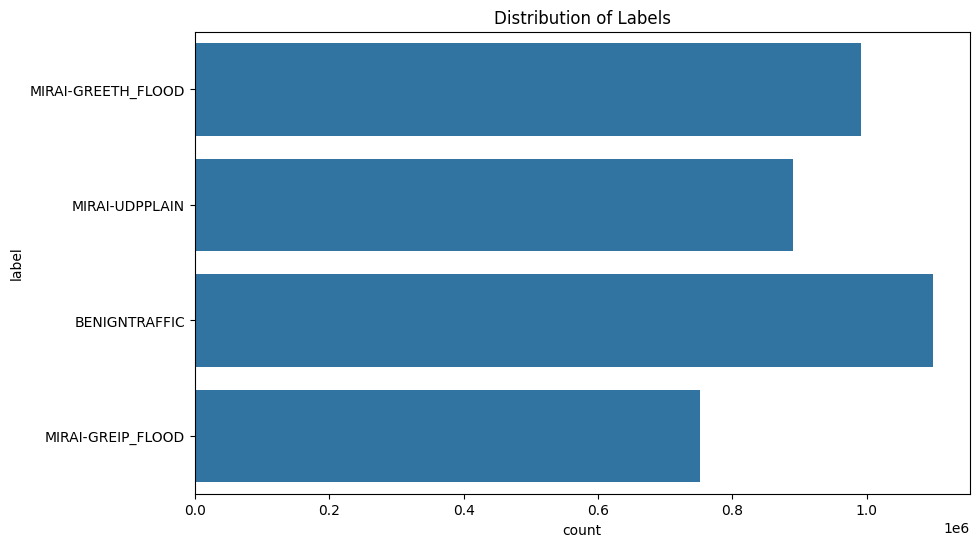

In [6]:
# Plotting the distribution of the 'label' column
plt.figure(figsize=(10, 6))
sns.countplot(y=df['label'])
plt.title('Distribution of Labels')
plt.show()

In [7]:
# Check for null values
print(df.isnull().sum())

# Drop rows with null values (you can also fill them if you prefer)
df.dropna(inplace=True)

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64


## 4. Feature Selection

To improve the efficiency and accuracy of our models, we employ a feature selection method to determine and retain only the most relevant features. This process is essential to reduce the dimensionality of the dataset and improve model training times.

In [8]:
# Create a new DataFrame 'X' by dropping the 'label' column
X = df.drop('label', axis=1)

# Assign the 'label' column values to the variable 'y'
y = df['label']


# Initialize a SelectKBest object to select the top 10 features based on the ANOVA F-value
selector = SelectKBest(f_classif, k=10)

# Fit the selector to the data and transform 'X' to retain only the top 10 features
X_new = selector.fit_transform(X, y)


# Get the column names of the selected features from 'X'
selected_features = X.columns[selector.get_support()]

# Print the names of the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Protocol Type', 'Duration', 'ack_flag_number', 'syn_count',
       'rst_count', 'HTTPS', 'TCP', 'UDP', 'Min', 'Variance'],
      dtype='object')


In [9]:
# Create a new DataFrame with the selected features and the label
df = pd.concat([pd.DataFrame(X_new, columns=selected_features), y.reset_index(drop=True)], axis=1)

In [10]:
# Optional: subsample the dataset to speed up training
# You can tune N_SAMPLES depending on your hardware and time constraints.
# With 3.7M rows, 150k–300k is usually reasonable for ~2–3h on a typical laptop/VM.

N_SAMPLES = 800_000  # change this if needed

if len(df) > N_SAMPLES:
    df_sampled = df.sample(n=N_SAMPLES, random_state=42)
else:
    df_sampled = df

print(f"Using {len(df_sampled)} rows out of {len(df)} total.")


Using 800000 rows out of 3732319 total.


# 5. Model Training and Validation

Here, we dive into the heart of our analysis. Each machine learning model is trained on a subset of the data and then validated on a separate set. By comparing the models' performances based on accuracy, precision, and recall, we identify the top-performing models. These models are then combined into an ensemble model, aiming to leverage their combined strengths for optimal threat detection.

In [11]:
# Create a new DataFrame 'X' by dropping the 'label' column
X = df_sampled.drop('label', axis=1)

# Assign the 'label' column values to the variable 'y'
y = df_sampled['label']

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split for models that use string labels directly
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Fit label encoder on full y so mapping is consistent
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split again for XGBoost specifically (numeric labels)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


This code block sets up, trains, and evaluates a variety of machine learning models on a given dataset. Initially, a dictionary named "models" is defined, where each key is the name of a machine learning algorithm and its associated value is an instance of that algorithm's classifier. Algorithms such as Logistic Regression, Decision Trees, Random Forest, and Neural Networks, among others, are included. The classifiers are initialized with specific parameters, like a maximum number of iterations for the Logistic Regression and Neural Network models.

In the subsequent portion of the code, each model from the "models" dictionary is trained on a training dataset, X_train and y_train. After training, predictions are made on a test dataset, X_test. The accuracy, precision, and recall of these predictions, relative to the true values y_test, are then computed. The results for each model, including its name and evaluation metrics, are stored in the "results" list. This approach provides a straightforward way to compare the performance of different machine learning models on the same dataset.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# For many models, scaling helps; tree-based models ignore it but it's fine in a pipeline.
# We will use pipelines only where needed.

models = {
    "DNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(
            hidden_layer_sizes=(128, 64),
            activation="relu",
            solver="adam",
            max_iter=50,          # reduced for speed; you can increase if you have time
            random_state=42
        ))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(
            n_neighbors=5,
            weights="distance",
            n_jobs=-1
        ))
    ]),
    "XGBoost": XGBClassifier(
        n_estimators=200,        # reduce/increase depending on time
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        eval_metric="mlogloss",
        n_jobs=-1,
        random_state=42,
        tree_method="hist"       # fast training on CPU
    ),
    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        random_state=42
    ),
    "DecisionTree": DecisionTreeClassifier(
        max_depth=None,
        random_state=42
    ),
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            max_iter=200,
            n_jobs=-1
        ))
    ]),
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == "XGBoost":
        # use encoded y and matching split
        model.fit(X_train_xgb, y_train_xgb)
        y_pred = model.predict(X_test_xgb)
        # map predictions back to original labels for metrics
        y_pred_labels = le.inverse_transform(y_pred)
        y_true_labels = le.inverse_transform(y_test_xgb)
        y_pred_used = y_pred_labels
        y_true_used = y_true_labels
    else:
        model.fit(X_train, y_train)
        y_pred_used = model.predict(X_test)
        y_true_used = y_test

    accuracy = accuracy_score(y_true_used, y_pred_used)
    precision = precision_score(y_true_used, y_pred_used, average="weighted", zero_division=0)
    recall = recall_score(y_true_used, y_pred_used, average="weighted", zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df



Training DNN...

Training KNN...

Training XGBoost...

Training ExtraTrees...

Training DecisionTree...

Training LogisticRegression...


,Model,Accuracy,Precision,Recall
3,ExtraTrees,0.965306,0.965227,0.965306
2,XGBoost,0.963875,0.963861,0.963875
0,DNN,0.960375,0.960327,0.960375
1,KNN,0.960006,0.959846,0.960006
4,DecisionTree,0.959838,0.959817,0.959838
5,LogisticRegression,0.935906,0.935460,0.935906


The part performs model ensembling, a technique where multiple machine learning models are combined to achieve better predictive performance than any individual model. First, it evaluates the performance of various standalone models on a dataset and identifies the top three models based on accuracy.

Once these top models are determined, a stacking ensemble is constructed. In stacking, predictions from individual models are used as inputs to another model (the meta-model), which then makes the final predictions. After training this ensemble model on the training data, it is evaluated on the test data, and its performance metrics (accuracy, precision, and recall) are computed. The aim is to capitalize on the strengths of the top models and possibly achieve superior results through their combined predictions.

In [13]:
# Convert the results to a DataFrame and sort by Accuracy
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Get the top 3 models
top_models = results_df.head(3)['Model'].tolist()

# Print the names of the models used in the ensemble
print(f"Models used in the ensemble: {', '.join(top_models)}")

# Create the ensemble model using the top 3 models
ensemble_model = StackingClassifier(estimators=[(name, models[name]) for name in top_models])
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')

# Add the ensemble model's results to the results list
results.append({
    'Model': 'Ensemble Model',
    'Accuracy': accuracy_ensemble,
    'Precision': precision_ensemble,
    'Recall': recall_ensemble
})

Models used in the ensemble: ExtraTrees, XGBoost, DNN


In [14]:
# Convert the results to a DataFrame and sort by Accuracy
final_results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Display the results
final_results_df.head(10)

,Model,Accuracy,Precision,Recall
6,Ensemble Model,0.967638,0.967603,0.967638
3,ExtraTrees,0.965306,0.965227,0.965306
2,XGBoost,0.963875,0.963861,0.963875
0,DNN,0.960375,0.960327,0.960375
1,KNN,0.960006,0.959846,0.960006
4,DecisionTree,0.959838,0.959817,0.959838
5,LogisticRegression,0.935906,0.935460,0.935906


**Ensemble Model**: This model tops the list with an accuracy of approximately 88.43%. The ensemble technique, which combines predictions from multiple models to improve overall performance, seems to have paid off. Its precision score is slightly higher than its accuracy, suggesting that the model's predictions are quite reliable.

**K-Nearest Neighbors (KNN)**: KNN comes in a close second, with an accuracy almost matching the ensemble model. Its precision is notably higher than its accuracy, which means that among the instances it predicted positively, a high percentage were correct.

**Neural Network**: Ranking third in terms of accuracy, the neural network model has a noticeably lower precision compared to its accuracy. This indicates that while the model can classify a large proportion of instances correctly, it might be over-predicting certain classes.

**Gradient Boosting**: This model's precision stands out, being the highest among the top models. Although its accuracy is slightly lower than the Neural Network, its high precision suggests that its positive predictions are very reliable.

**Random Forest & Extra Trees**: Both these models have almost identical accuracy and precision scores. They perform well in terms of accuracy, but their precision scores suggest there's room for improvement in the reliability of their positive predictions.

**Decision Tree**: The Decision Tree model's performance metrics are closely aligned with the Random Forest and Extra Trees models. This is expected since Random Forests are essentially an ensemble of Decision Trees.

**Logistic Regression & SVM**: Both these models have similar accuracy scores, but their precision is lower than the models ranked above them. This might imply that these models are making more false positive predictions compared to the top-performing models.

**Gaussian Naive Bayes**: Despite being last on the list, its precision score is quite high, almost matching the Gradient Boosting model. This suggests that while the model may not be the most accurate overall, its positive predictions are highly reliable.

# 6. Conclusions

In conclusion, as IoT continues to evolve and integrate deeper into our daily lives, ensuring the security of these devices becomes paramount. Through machine learning models and ensemble techniques, this notebook showcases a potential approach to enhancing IoT threat detection capabilities.

# 7. References

[1] Q. A. Al-Haija, Mu'awya Al-Dala'ien. (2022). ELBA-IoT: An Ensemble Learning Model for Botnet Attack Detection in IoT Networks. doi:10.3390/jsan11010018

[2] N. Naz, M. Khan, Suliman A. Alsuhibany, Muhammad Diyan, Zhiyuan Simon Tan, Muhammad Almas Khan, Jawad Ahmad. (2022). Ensemble learning-based IDS for sensors telemetry data in IoT networks. doi:10.3934/mbe.2022493

[3] Giovanni Aparecido Da Silva Oliveira, P. Lima, Fabio Kon, R. Terada, D. Batista, Roberto Hirata, Mosab Hamdan. (2022). A Stacked Ensemble Classifier for an Intrusion Detection System in the Edge of IoT and IIoT Networks. doi:10.1109/LATINCOM56090.2022.10000559

[4] Zaher Salah, Esraa Abu Elsoud. (2023). Enhancing Network Security: A Machine Learning-Based Approach for Detecting and Mitigating Krack and Kr00k Attacks in IEEE 802.11. doi:10.3390/fi15080269

[5] V. Priya, I. Thaseen, T. Gadekallu, M. K. Aboudaif, E. A. Nasr. (2021). Robust Attack Detection Approach for IIoT Using Ensemble Classifier. doi:10.32604/cmc.2021.013852

[6] N. Pandey, P. K. Mishra. (2023). Detection of DDoS attack in IoT traffic using ensemble machine learning techniques. doi:10.3934/nhm.2023061

[7] Bishal Laha, Debopriya Basu, Souvik Biswas, Pallabi Gupta, Bikash Sadhukhan. (2023). Intrusion Detection in IoT Systems Using Ensemble Machine Learning Techniques. doi:10.1109/INDISCON58499.2023.10270505